In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("../data/subset_dataset_frunza_roxana.csv")

In [3]:
data.shape

(1168, 13)

In [4]:
data.isna().sum()

BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType      683
MasVnrArea        6
SalePrice         0
dtype: int64

In [5]:
data = data.drop(columns=["MasVnrType"])

In [6]:
data.head()

,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,SalePrice
0,1Fam,1Story,5,6,1957,1957,Gable,CompShg,MetalSd,MetalSd,0.0,145000
1,1Fam,2Story,6,7,1993,1994,Gable,CompShg,VinylSd,VinylSd,0.0,178000
2,1Fam,1Story,5,7,1910,1950,Gable,CompShg,MetalSd,Wd Sdng,0.0,85000
3,1Fam,1.5Fin,5,7,1937,1950,Gable,CompShg,Wd Sdng,Wd Sdng,252.0,175000
4,1Fam,1.5Fin,5,6,1924,1950,Gable,CompShg,BrkFace,Wd Sdng,0.0,127000


In [7]:
numeric_cols = data.select_dtypes(include=['number'])
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

In [8]:
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [9]:
selected_features = ['OverallQual', 'YearBuilt', 'YearRemodAdd','MasVnrArea',]

In [10]:
from sklearn.model_selection import train_test_split

x = data[selected_features]      
y = data['SalePrice']            

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [11]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42) 
model.fit(x_train, y_train)


DecisionTreeRegressor(random_state=42)

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")


R² Score: 0.48211248614302615
Mean Squared Error (MSE): 3347526601.0655565
Mean Absolute Error (MAE): 38401.6891025641


    The DecisionTreeRegressor obtained an R^2 score of 0.48, meaning it explains about 48% of the variance in SalePrice. 
    The MSE and MAE indicate a moderate prediction error

    Overall, the model performs moderately well

In [13]:
x = x_train 

feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)


        Feature  Importance
0   OverallQual    0.676191
3    MasVnrArea    0.119295
2  YearRemodAdd    0.103682
1     YearBuilt    0.100832


    The model shows that OverallQual is the most influential predictor of SalePrice with over 67% importance. This confirms that the overall quality of the house is the strongest driver of price.

In [14]:
max_depths = [3, 5, 7, 10]

for depth in max_depths:
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    print(f"max_depth = {depth}")
    print("R² Score:", r2_score(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))

max_depth = 3
R² Score: 0.7026226315092247
MSE: 1922190871.4575968
MAE: 32057.751887432794
max_depth = 5
R² Score: 0.7545751259027464
MSE: 1586379807.6248176
MAE: 29347.344784323508
max_depth = 7
R² Score: 0.5817880640542018
MSE: 2703242582.6128693
MAE: 31956.88026000921
max_depth = 10
R² Score: 0.5198849974420833
MSE: 3103372256.773789
MAE: 34563.34932738202


    The best value is max_depth = 5. It gives the highest accuracy and the lowest prediction error.

    Without setting max_depth, the Decision Tree performed poorly, showing signs of overfitting. 
    After setting max_depth = 5, the performance improved significantly, proving that depth limitation leads to much better generalization.

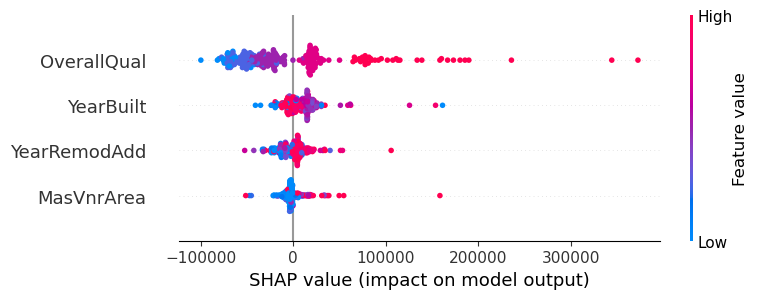

In [18]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer(x_test)

shap.summary_plot(shap_values, x_test, feature_names=x_test.columns)
plt.show()

    Features with larger spreads of SHAP values have a stronger influence on the output

    OverallQual appears to be the most impactful predictor, followed by YearBuilt/YearRemodAdd. 
    Higher feature values (red) tend to increase the predicted sale price, while lower values (blue) decrease it